In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing
from keras.layers import Input, Dense, Activation, Flatten, Dropout, Reshape
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris['target_names'])
print(iris['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris_targets  = iris['target']
iris_features = iris['data']
print(iris_features.shape)
print(iris_targets .shape)

(150, 4)
(150,)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_targets, train_size=0.8, test_size=0.2)

In [7]:
# one hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)


In [0]:
# 正規化
x_train = preprocessing.minmax_scale(x_train)
x_test = preprocessing.minmax_scale(x_test)

In [0]:
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

batch_size = 20
epochs = 80

In [10]:
inputs = Input(shape=(input_dim,))
x = inputs

x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(8)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(output_dim)(x)
predictions = Activation('softmax')(x)

In [11]:
model = Model(input=inputs, output=predictions)
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  """Entry point for launching an IPython kernel.


In [12]:
history = model.fit(
    x = x_train, 
    y = y_train,
    batch_size = batch_size,
    epochs = epochs, 
    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 96 samples, validate on 24 samples
Epoch 1/80





96/96 [==============================] - 2s 16ms/step - loss: 1.4177 - acc: 0.5417 - val_loss: 1.4962 - val_acc: 0.5000
Epoch 2/80
96/96 [==============================] - 0s 393us/step - loss: 1.1970 - acc: 0.5625 - val_loss: 1.3919 - val_acc: 0.5417
Epoch 3/80
96/96 [==============================] - 0s 380us/step - loss: 1.0390 - acc: 0.6146 - val_loss: 1.3196 - val_acc: 0.5417
Epoch 4/80
96/96 [==============================] - 0s 362us/step - loss: 0.9711 - acc: 0.6042 - val_loss: 1.2568 - val_acc: 0.5417
Epoch 5/80
96/96 [==============================] - 0s 397us/step - loss: 0.9152 - acc: 0.6042 - val_loss: 1.2137 - val_acc: 0.5417
Epoch 6/80
96/96 [==============================] - 0s 368us/step - loss: 0.8243 - acc: 0.6563 - val_loss: 1.1650 - val_acc: 0.5417
Epoch 7/80
96/96 [==============================] - 0s 343us/st

In [0]:
def compare_TV(history):
    import matplotlib.pyplot as plt

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.plot(epochs, loss, 'bo' ,label = 'training loss')
    plt.plot(epochs, val_loss, 'b' , label= 'validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

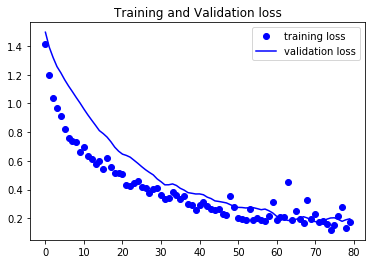

In [14]:
compare_TV(history)

In [15]:
model.evaluate(x_test, y_test, batch_size=1)

30/30 [==============================] - 0s 2ms/step


[0.11919387721767029, 1.0]